#Supervised Learning: Regression, Classification, and Advanced Techniques

##Linear Regression

In this example, we first generate synthetic data for linear regression and convert it to a pandas DataFrame. We then display a scatter plot of the data using Matplotlib. Next, we preprocess the data using OpenCV and perform linear regression using TensorFlow and Keras. We train the model on the training data, evaluate it on the test data, and plot the fitted line. Finally, we perform linear regression using the SciPy library and print the results, including the slope, intercept, and R-squared value.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

In [ ]:
# Convert the data to a pandas DataFrame
data = pd.DataFrame(np.hstack([X, y]), columns=["X", "y"])

In [ ]:
# Display a scatter plot of the data
plt.scatter(data["X"], data["y"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot of the synthetic data")
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform linear regression using TensorFlow and Keras
# Create a Keras Sequential model with a single dense layer
model = keras.Sequential([layers.Dense(1, input_shape=(1,))])

In [ ]:
model.compile(optimizer="sgd", loss="mean_squared_error") # Compile the model with the stochastic gradient descent (SGD) optimizer and mean squared error loss function

In [ ]:
# Train the model on the training data for 50 epochs
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
# Evaluate the model on the test data and calculate the mean squared error
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse:.4f}")

In [ ]:
# Plot the fitted line on the top of the scatter plot
plt.scatter(X, y)
plt.plot(X, model.predict(X), "r")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear regression fitted line")
plt.show()

In [ ]:
# Perform linear regression using SciPy
# Calculate the slope, intercept, R-squared, p-value, and standard error using the linregress function
slope, intercept, r_value, p_value, std_err = stats.linregress(X.ravel(), y.ravel())

In [ ]:
# Print the results using SciPy
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R-squared: {r_value**2:.4f}")

###Energy Forecasting

Predicting energy usage in buildings or households based on factors like weather, occupancy, and building characteristics.

In [ ]:
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)

In [ ]:
# Rename the columns for better readability
column_names = {
    'X1': 'relative_compactness',
    'X2': 'surface_area',
    'X3': 'wall_area',
    'X4': 'roof_area',
    'X5': 'overall_height',
    'X6': 'orientation',
    'X7': 'glazing_area',
    'X8': 'glazing_area_distribution',
    'Y1': 'heating_load',
    'Y2': 'cooling_load'
}
data = data.rename(columns=column_names)

In [ ]:
# Split the data into features and target variable
X = data.drop(['heating_load', 'cooling_load'], axis=1)
y = data[['heating_load', 'cooling_load']]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit a linear regression model to predict the target variables based on the data
model = LinearRegression().fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

In [ ]:
# Plot the actual vs. predicted energy usage
plt.scatter(y_test['heating_load'], y_pred[:, 0], label='Heating Load')
plt.scatter(y_test['cooling_load'], y_pred[:, 1], label='Cooling Load')
plt.xlabel("Actual Energy Usage")
plt.ylabel("Predicted Energy Usage")
plt.title("Actual vs. Predicted Energy Usage")
plt.legend()
plt.show()

##Logistic Regression

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
# Generate synthetic data for logistic regression
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=42)

In [ ]:
# Convert the data to a pandas DataFrame
data = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]), columns=["X1", "X2", "y"])

In [ ]:
# Display a scatter plot of the data
plt.scatter(data["X1"], data["X2"], c=data["y"], cmap="viridis")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter plot of the synthetic data")
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform logistic regression using TensorFlow and Keras
# Create a Keras Sequential model with a single dense layer and a sigmoid activation function
model = keras.Sequential([layers.Dense(1, activation="sigmoid", input_shape=(2,))])

In [ ]:
# Compile the model with the stochastic gradient descent (SGD) optimizer and binary cross-entropy loss function
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Train the model on the training data for 50 epochs
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
# Evaluate the model on the test data and calculate the accuracy
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# Plot the decision boundary on top of the scatter plot
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
plt.scatter(data["X1"], data["X2"], c=data["y"], cmap="viridis")
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap="viridis")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic regression decision boundary")
plt.show()

###Medical diagnosis

Predicting whether a patient has a particular disease based on symptoms or test results. This example uses the Pima Indians Diabetes dataset. This dataset contains information on female patients, and the goal is to predict whether a patient has diabetes based on various diagnostic measurements.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

In [ ]:
# Split the data into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# Print the confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Plot the results
plt.scatter(X_test_scaled[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test_scaled[:, 1], y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Logistic Regression: Actual vs Predicted Outcomes')
plt.xlabel('Scaled Glucose Level')
plt.ylabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.legend()
plt.show()

##Decision Trees

###Credit Risk Assessment

In [ ]:
#Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [ ]:
# Load the credit risk dataset
credit_risk_data = pd.read_csv('/content/drive/MyDrive/lab/Presentations/Google Colab/data/loanprediction/train.csv')

In [ ]:
# Replace '3+' with 3 in the 'Dependents' column
credit_risk_data['Dependents'] = credit_risk_data['Dependents'].replace('3+', 3)

In [ ]:
# Fill missing values with median for numeric columns and mode for categorical columns
numeric_columns = credit_risk_data.select_dtypes(include=['number']).columns
categorical_columns = credit_risk_data.select_dtypes(include=['object']).drop(columns=['Loan_Status']).columns
credit_risk_data[numeric_columns] = credit_risk_data[numeric_columns].fillna(credit_risk_data[numeric_columns].median())
credit_risk_data[categorical_columns] = credit_risk_data[categorical_columns].fillna(credit_risk_data[categorical_columns].mode().iloc[0])

In [ ]:
# Prepare the data by encoding categorical variables and dropping unnecessary columns
credit_risk_data = pd.get_dummies(credit_risk_data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])
credit_risk_data = credit_risk_data.drop(columns=['Loan_ID'])

In [ ]:
# Separate the data and labels
X = credit_risk_data.drop(columns=['Loan_Status'])
y = credit_risk_data['Loan_Status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Predict the labels on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

##Support Vector Machines

In this example, we will use the Credit Card Fraud Detection dataset which contains transactions made by credit cards in September 2013 by European cardholders.
We will use an SVM to detect fraudulent transactions based on their characteristics and patterns. This code loads the Credit Card Fraud Detection Dataset, splits it into training and testing sets, and trains an SVM model with a linear kernel to detect fraudulent transactions. It then evaluates the performance of the model using a classification report.

In [ ]:
#Import necessary libraries and packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# Load the dataset
creditcard_df = pd.read_csv('/content/drive/MyDrive/lab/Presentations/Google Colab/creditcard.csv')

In [ ]:
creditcard_df

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(creditcard_df.drop('Class', axis=1), creditcard_df['Class'], test_size=0.2, random_state=42)

#Class column contains the label indicating whether a transaction is fraudulent or not, so it is dropped from X data and used as y target data

In [ ]:
# Train the SVM model
model = SVC(kernel='linear') # linear refers to the type of hyperplane the algorithm tries to find to fit the data into feature space
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

##Hidden Markov Model

In [ ]:
!pip install hmmlearn nltk

In [ ]:
#Import the necessary libraries
import numpy as np #numerical computations
from hmmlearn import hmm
from sklearn.model_selection import train_test_split #splitting training and testing set
from sklearn.metrics import accuracy_score
from nltk.corpus import brown
from nltk.tag import hmm
import nltk #working with hmm and text data

In [ ]:
# Download the Brown Corpus dataset, which is a collection of text that is annotated with part of speech tags
nltk.download('brown')
nltk.download('universal_tagset')

In [ ]:
# Load the Brown Corpus dataset and convert to universal tagset
tagged_sents = brown.tagged_sents(tagset='universal') #used to get sentences with their tags

In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(tagged_sents, test_size=0.2, random_state=42)

In [ ]:
# Train an HMM model on the training data to learn the probabilistic relationship between the observations and hidden states
trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train_supervised(train_data)

In [ ]:
# Evaluate the HMM model on the test set
accuracy = hmm_tagger.evaluate(test_data)
print(f'Accuracy: {accuracy}')

##Ensemble learning methods

###Bagging

In [1]:
%%capture
!pip install scikit-learn matplotlib

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
# max_samples: int or float, default=1.0. The number of samples to draw from X to train each base estimator.
# max_features: int or float, default=1.0. The number of features to draw from X to train each base estimator.

####Application

In [2]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X, y = iris.data[:, :2], iris.target

In [4]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X, y)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

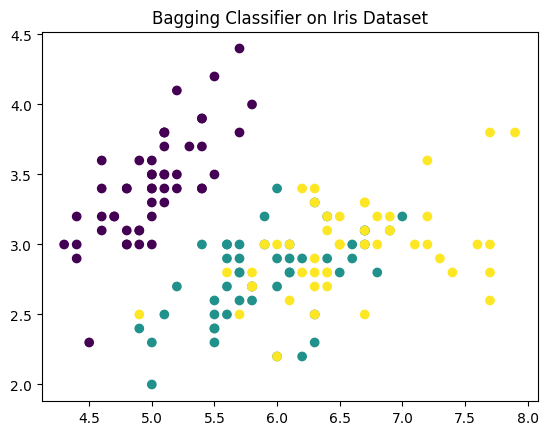

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Bagging Classifier on Iris Dataset")
plt.show()

###Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

####Application

In [14]:
%%capture
!pip install xgboost numpy

In [15]:
# Import necessary libraries
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [8]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Convert the data into DMatrix format for XGBoost
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [11]:
# Set parameters for the XGBoost model
param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 3}

In [12]:
# Train the model
model = xgb.train(param, D_train, 20)

In [16]:
# Predict classes for the test set
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

In [17]:
# Print the accuracy score
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Accuracy = 1.0


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

####Application

In [18]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predict the classes of the test set
y_pred = clf.predict(X_test)

In [24]:
# Print the accuracy score
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))

Accuracy = 1.0


###AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# Load iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [32]:
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

In [33]:
# Predict the response for test dataset
y_pred = model.predict(X_test)

In [34]:
# Calculate and print the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


###Gradient Boosting Machines

In [36]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
X, y = make_hastie_10_2(random_state=0)

In [39]:
# Split the data into training and test sets
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [40]:
# Create GradientBoostingClassifier object
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

In [41]:
# Train GradientBoostingClassifier
model = gbc.fit(X_train, y_train)

In [42]:
# Predict the response for test dataset
y_pred = model.predict(X_test)

In [43]:
# Calculate and print the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.913
